In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

Merge datasets

In [19]:
merged_df = pd.merge(transactions_df, customers_df, on="CustomerID")

Feature engineering

->Calculate total spending and transaction count for each customer

In [22]:
customer_features = merged_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'Quantity': 'sum'
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'TransactionID': 'TransactionCount',
    'Quantity': 'TotalQuantity'
}).reset_index()

->Merge with profile information

In [23]:
customer_features = pd.merge(customer_features, customers_df[['CustomerID', 'Region']], on='CustomerID')

->Encode region as numerical values

In [24]:
customer_features['Region'] = customer_features['Region'].astype('category').cat.codes

Normalize the data

In [25]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop('CustomerID', axis=1))

Clustering

In [26]:
n_clusters = 5  # Chosen number of clusters (can be tuned)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(scaled_features)


Add cluster labels to the dataset

In [27]:
customer_features['Cluster'] = labels

Calculate Davies-Bouldin Index

In [28]:
db_index = davies_bouldin_score(scaled_features, labels)

Visualize clusters using pairplot

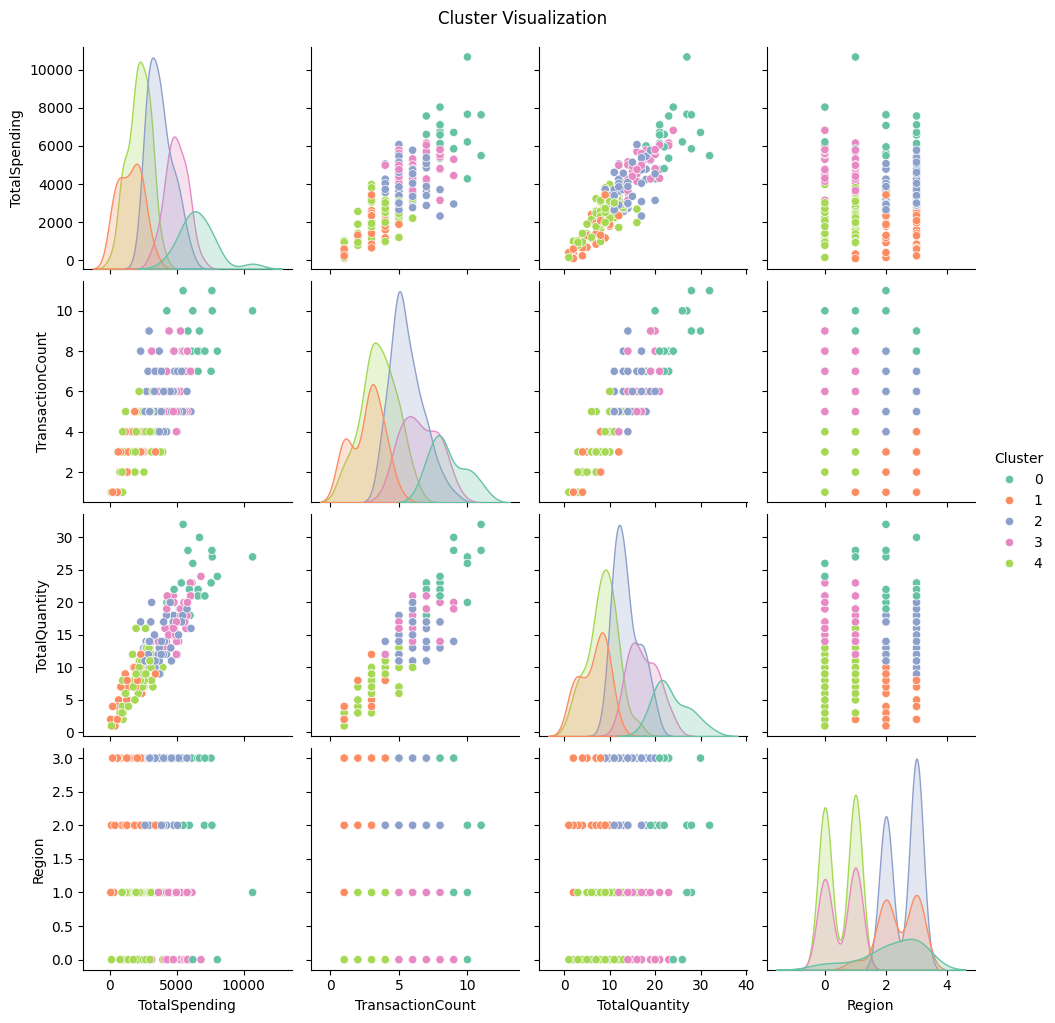

In [29]:
sns.pairplot(customer_features, hue='Cluster', diag_kind='kde', palette='Set2')
plt.suptitle('Cluster Visualization', y=1.02)
plt.savefig('cluster_visualization.png')
plt.show()

Output results

In [30]:
print(f"Number of clusters: {n_clusters}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Number of clusters: 5
Davies-Bouldin Index: 1.0175
